In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [2]:
print(os.listdir("Sales_Data"))

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']



По сути, мне необходимо примерно понять последовательность по которой мне нужно будет работать
и отработать за неделю последовательность, в которой я смогу спокойно ориентироваться. Так-же
работать именно с крупными датасетами научиться, дабы не терять слишком много времени, как в прошлый
раз, в ожидании обработки данных, а сразу тыкнуть все приколы и понимать казуальность в датасете.

Как понимаю, если тебе требуется как-то изменять данные в датасете - следует себя по рукам шлёпнуть
и поискать методы по обработки данных, что уже у тебя есть.

Т.е. вывести методику по работе, а так-же навыки по работе с крупными датасетами.

Так-же нужно пересмотреть свои работы, а так-же немного по рефлексировать над тем, что было в них 
написано.

Так-же отработать взаимодействие с mongobd(либо postgress) на Linux
Подучиться коннектиться через консоль к гиту и с машины делать репозиторий на гит аккаунте.



In [3]:
try:
    df = pd.read_csv("df.csv")
except:
    print('makin` stuff')
    path = "Sales_Data"
    files = os.listdir(path)
    df = pd.DataFrame()

    for file in files:
        current_data = pd.read_csv(path+"/"+file ,  encoding = "ISO-8859-1")  
        df = pd.concat([df,current_data])

    df.to_csv("df.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.isna().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df = df[~df.isnull().any(axis=1)]
df = df[df['Order Date'].str[0:2] != "Or"]
df.reset_index(drop=True, inplace=True)

In [7]:
df.isna().sum(axis=0)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
"""
Т.е. я мог не ждать пол ебанных часа, чтобы просто перехуярить даты в... Даты, а просто по стрингу
отсортировать... 
"""
#a = df1.loc[(df1['Order Date'] >= '04/01/19') & (df1['Order Date'] < '04/31/19')]

'\nТ.е. я мог не ждать пол ебанных часа, чтобы просто перехуярить даты в... Даты, а просто по стрингу\nотсортировать... \n'

In [11]:
#df[df['Order Date'].astype(str).str.contains('^01',flags = re.I, regex=True)].head(100)

In [12]:
#a.info()

In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


In [14]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [15]:
profit = list()

In [16]:
stuff = np.arange(1,13)
for i in stuff:
    if i <= 9:
        month = str(0) + str(i)
    else:
        month = str(i)
    current_month = df.loc[(df['Order Date'] >= f'{month}/01/19') &
                           (df['Order Date'] < f'{month}/32/19')].copy()
    profit.append(sum(current_month['Sales']))

In [17]:
print(profit)

[1822256.729999914, 2202022.4199999636, 2807100.3800003603, 3390670.240000704, 3152606.750000553, 2577802.260000178, 2647775.7600002377, 2244467.8799999943, 2097560.129999891, 3736726.8800009703, 3199603.200000589, 4613443.340001534]


In [18]:
max_num = max(profit)

In [19]:
print(str(max_num) + " Month " + str(profit.index(max_num)+1))

4613443.340001534 Month 12


In [20]:
"""
#How it made dude

#Ага... Т.е. я это ещё легче мог сделать .-.
df = df[~df.isnull().any(axis=1)]
df = df[df['Order Date'].str[0:2] != "Or"]
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

df.groupby('Month').sum()
"""

'\n#How it made dude\n\n#Ага... Т.е. я это ещё легче мог сделать .-.\ndf = df[~df.isnull().any(axis=1)]\ndf = df[df[\'Order Date\'].str[0:2] != "Or"]\ndf[\'Month\'] = df[\'Order Date\'].str[0:2]\ndf[\'Month\'] = df[\'Month\'].astype(\'int32\')\n\ndf.groupby(\'Month\').sum()\n'

In [21]:
#Ага... Т.е. я это ещё легче мог сделать .-.
df = df[~df.isnull().any(axis=1)]
df = df[df['Order Date'].str[0:2] != "Or"]
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')


In [22]:
results = df.groupby('Month').sum()

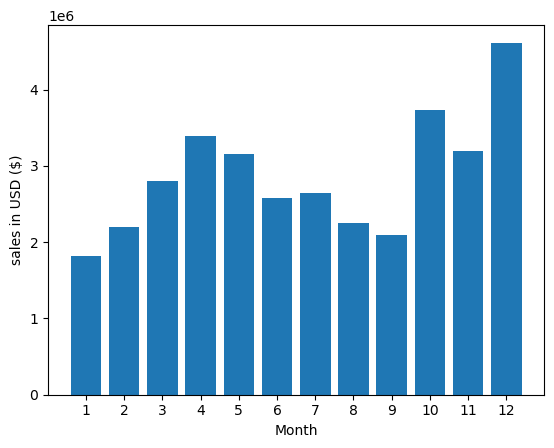

In [23]:
plt.bar(stuff, results['Sales'])
plt.xticks(stuff)
plt.ylabel('sales in USD ($)')
plt.xlabel('Month')
plt.show()

In [24]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['Town']=df['Purchase Address'].apply(lambda x: get_city(x)+' ' + get_state(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Town
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [25]:
#df['Town'] = df['Purchase Address'].str.rsplit(',').str[-2] 

In [26]:
#df['State'] = df['Purchase Address'].str.rsplit(',').str[-1]

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Town
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [28]:
results = df.groupby('Town').sum()

In [29]:
results = results.reset_index()

In [30]:
results

,Town,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",2795498.58,104794
1,Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",1819581.75,69829
2,Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",3661642.01,141112
3,Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",2767975.40,104620
4,Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",5452570.80,208325
5,New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",4664317.43,175741
6,Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",449758.27,17144
7,Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",1870732.34,70621
8,San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",8262203.91,315520
9,Seattle WA,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.01,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",2747755.48,104941


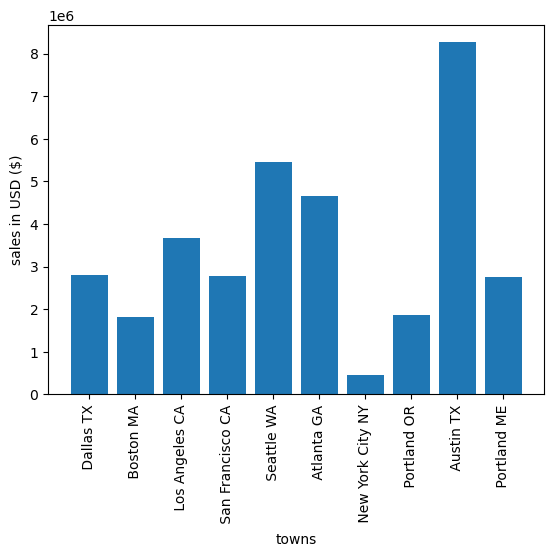

In [31]:
towns =df['Town'].unique()

plt.bar(towns, results['Sales'])
plt.xticks(towns,rotation='vertical')
plt.ylabel('sales in USD ($)')
plt.xlabel('towns')
plt.show()

In [32]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Strange\AppData\Local\Temp\ipykernel_5300\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Town
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [34]:
df['hour'] = df['Order Date'].dt.hour

In [35]:
meow = df.drop('hour',axis=1).copy()
meow = meow.drop('Order Date',axis=1).copy()
results_by_product = meow.groupby('Product').sum()
results_by_product = results_by_product.reset_index()

In [36]:
results_by_product.head()

,Product,Order ID,Quantity Ordered,Price Each,Purchase Address,Sales,Month,Town,hour
0,20in Monitor,1765881766591766731766901767031767101767331767...,4129,451068.99,"765 Cherry St, Seattle, WA 98101804 Church St,...",454148.71,29336,Seattle WA Dallas TX Boston MA San Francisco ...,58764
1,27in 4K Gaming Monitor,1765691766001766671767221767231767431767461767...,6244,2429637.70,"657 Hill St, Dallas, TX 7500187 West St, Bosto...",2435097.56,44440,Dallas TX Boston MA Los Angeles CA New York C...,90916
2,27in FHD Monitor,1765871766231766481766691767351767561767791768...,7550,1125974.93,"557 5th St, Los Angeles, CA 90001807 12th St, ...",1132424.50,52558,Los Angeles CA Atlanta GA Portland OR Dallas ...,107540
3,34in Ultrawide Monitor,1766621766771766851767001767391767541767581767...,6199,2348718.19,"678 Hickory St, Portland, OR 97035661 Washingt...",2355558.01,43304,Portland OR Austin TX New York City NY Dallas...,89076
4,AA Batteries (4-pack),1765701765791766141766221766241766361766421766...,27635,79015.68,"186 12th St, Dallas, TX 75001886 Jefferson St,...",106118.40,145558,Dallas TX New York City NY San Francisco CA S...,298342


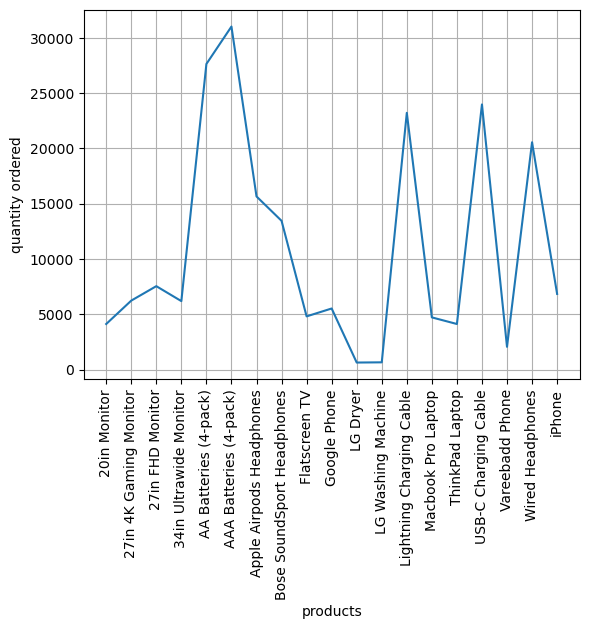

In [37]:
products =  [Product for Product, df in df.groupby('Product')]

plt.plot(products, results_by_product['Quantity Ordered'])
plt.xticks(products, rotation='vertical')
plt.grid()
plt.ylabel('quantity ordered')
plt.xlabel('products')
plt.show()

In [70]:
meow = df.drop('hour',axis=1).copy()
meow = meow.drop('Order Date',axis=1).copy()
prices =  meow.groupby('Product')['Price Each'].mean()


product_group = df.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
products =  [Product for Product, df in product_group]

In [66]:
print(quantity_ordered)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


C:\Users\Strange\AppData\Local\Temp\ipykernel_5300\2346960895.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8)


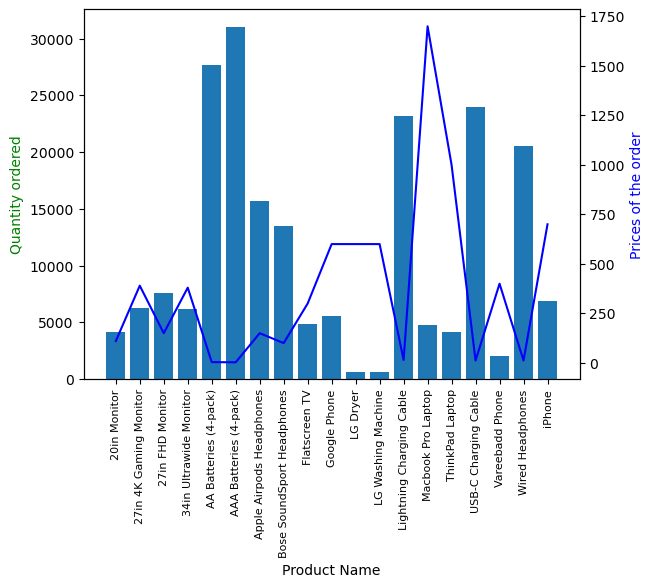

In [76]:

fig, ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity ordered', color='g')
ax2.set_ylabel('Prices of the order', color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()

In [38]:
stuff = df[df['Order ID'].duplicated(keep=False)].copy()
stuff['Grouped'] = stuff.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
stuff = stuff[['Order ID','Grouped']].drop_duplicates()

stuff.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [51]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in stuff['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))


In [52]:
count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

ТАК. МНЕ СРОЧНО НУЖНО НАЙТИ КАК ПРОДЛЕВАТЬ ГРАФИКИ.

Итого:

Для эффективной работы нам необходимо:

Понять, какие вопросы нам заданы и то, как ответить на них из датасета, что у нас на данный момент находится на руках.

Т.е эти самые:

Основная инфа о исследовании

Основные инструменты, что были использованы

Решения и находки

Решения
    Что было сделано, зачем, почему, для чего и как это принесёт выгоду
    
Находки
    То, какие зависимости были найдены в данных и как они коррелируют с прибылью для компаний.
    

По сути основная работа:

Определение проблемы и постановка вопросов, что необходимо решить, да найти в данных
Рассмотрение датасета и определение его основных моментов(где данных много, где их мало, почему их мало, какие данные здесь имеются, какие даты, что происходило в стране и в мире в данный момент)
Определение того, что при случае нужно будет обрабатывать, какие кореляции уже находит машина на данный момент в численных данных, что находятся в Датасетах.
Чистка датасетов от Нанов, определение переменных, удаление частей, перевод данных в определенные форматы
(Прикидывание разницы между нарезанными данными и не нарезанными)
Нарезка данных
Нахождение взаимосвязей уже на графиках самих датасетов.
Выведение нужных графиков, по данным нарезанным, с ответом на вопросы
Нахождение того, насколько отличаются нарезанные данные от ненарезанных.
Кластеризация. Определение того, что там машина вообще на кластеризировала и по каким параметрам. 
Подбитие кластеризации по наиболее лучшим параметрам
Подбитие графиков по кластерам
Планировка модели и необходимости её тренировки.
Создание базовых моделей.
Выбор методик для тренировки моделей.
Нарезка датасета на тренировочные части
Подбитие точности, до предела.
Выгрузка модели
Написание API и WebAPI
Подсоединение туда модели.
Презентация.


